In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [2]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
print(city_data.head())
print(ride_data.head())

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


In [3]:
# Combine the data into a single dataset
combine_data = city_data.merge(ride_data, on='city', how='outer')

In [4]:
ride_count = combine_data.groupby('city')['ride_id'].count()
ride_count.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [5]:
fare_avg = combine_data.groupby('city')['fare'].mean()
fare_avg.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [6]:
city_data.index = city_data['city']
city_data['avg_fare'] = fare_avg
city_data['rider'] = ride_count
city_data.head()

,city,driver_count,type,avg_fare,rider
city,,,,,
Richardfort,Richardfort,38,Urban,22.373214,28
Williamsstad,Williamsstad,59,Urban,24.362174,23
Port Angela,Port Angela,67,Urban,23.836842,19
Rodneyfort,Rodneyfort,34,Urban,28.616957,23
West Robert,West Robert,39,Urban,25.123871,31


In [7]:
city_types = city_data['type'].unique()
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
split_datas = []
for city_type in city_types:
    split_datas.append(city_data.loc[city_data['type'] == city_type])

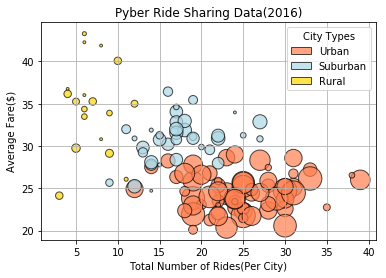

In [27]:
colors = ['coral', 'lightblue', 'gold']
# Build the scatter plots for each city types
for color, city_type, split_data in zip(colors, city_types, split_datas):
    plt.scatter(
        x = split_data['rider'],
        y = split_data['avg_fare'],
        s = 8 * split_data['driver_count'],
        edgecolors = 'black',
        alpha = 0.7,
        c = color,
        label = city_type
    )
plt.title('Pyber Ride Sharing Data(2016)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare($)')
# Create a legend
mark_label = [
    patch.Circle((0, 0), radius=1, facecolor=color, label=label, alpha=0.7, edgecolor='black') for color, label in zip(colors, city_types)
]
plt.legend(handles=mark_label, title='City Types')
plt.grid()
plt.savefig('Pyber Ride Sharing Data(2016).png')

In [ ]:
# Obtain the x and y coordinates for each of the three city types



# Incorporate the other graph properties



# Incorporate a text label regarding circle size

# Save Figure


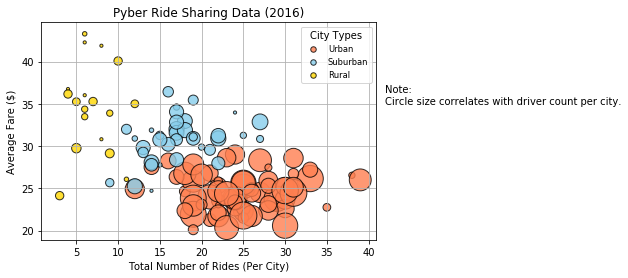

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

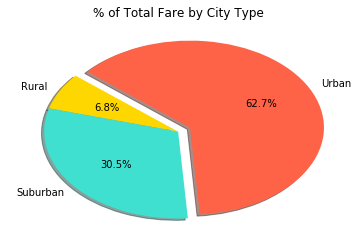

In [23]:
colors = ['gold', 'turquoise', 'tomato']
# Calculate Type Percents
fare_total = combine_data.groupby('type')['fare'].sum()
# Build Pie Chart
plt.pie(fare_total.values, 
        labels=fare_total.keys(), 
        colors=colors, 
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=140,
        explode=[0, 0, 0.1])
plt.title('% of Total Fare by City Type')
# Save Figure
plt.savefig('total_fares_by_city_type.png')

In [51]:
# Show Figure
plt.show()

## Total Rides by City Type

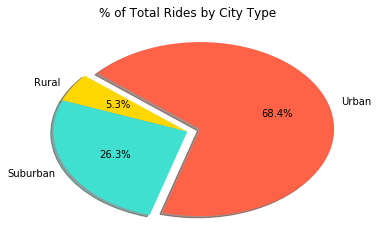

In [24]:
# Calculate Ride Percents
ride_total = combine_data.groupby('type')['ride_id'].count()
# Build Pie Chart
plt.pie(ride_total.values, 
        labels=fare_total.keys(), 
        colors=colors, 
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=140,
        explode=[0, 0, 0.1])
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig('total_rides_by_city_type.png')

## Total Drivers by City Type

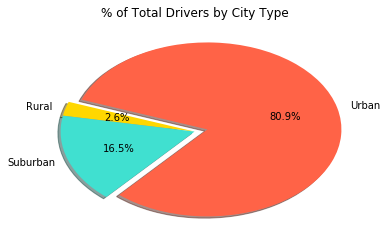

In [25]:
# Calculate Driver Percents
total_driver = city_data.groupby('type')['driver_count'].sum()
# Build Pie Charts
plt.pie(total_driver, 
        labels=fare_total.keys(), 
        colors=colors, 
        autopct="%1.1f%%",
        shadow=True, 
        startangle=160,
        explode=[0, 0, 0.1])
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig('total_drivers_by_city_type.png')